In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
import sys
sys.path.append('../')
from src import(
    UNet,
    SEUNet,
    LandmarkDataset,
    get_valid_transforms,
    load_model_weights,
)

In [3]:
args = dict()
args['base_folder'] = '../data/val'
args['weight_fn'] = r'C:\Users\bed1\src\cephalometric_landmark_detection\checkpoint\0407021430\model_best.pth'
args['num_classes'] = 10

assert os.path.isdir(args['base_folder']), args['base_folder']
assert os.path.isfile(args['weight_fn']), args['weight_fn']

In [4]:
model = SEUNet()
model.load_state_dict(torch.load(args['weight_fn'], map_location=torch.device('cpu')))
# model = load_model_weights(model, args['weight_fn'])
model.eval();

In [5]:
dataset = LandmarkDataset(
    base_folder=args['base_folder'],
    transforms=get_valid_transforms(),
)

154.png
GT: [362. 276.] Pred: [361. 278.]
GT: [347. 463.] Pred: [346. 462.]
GT: [424. 429.] Pred: [425. 424.]
GT: [407. 198.] Pred: [413. 193.]
GT: [532. 454.] Pred: [538. 457.]
GT: [643. 410.] Pred: [639. 412.]
GT: [686. 387.] Pred: [683. 390.]
GT: [700. 363.] Pred: [701. 362.]
GT: [696. 378.] Pred: [696. 379.]
GT: [566. 208.] Pred: [567. 209.]


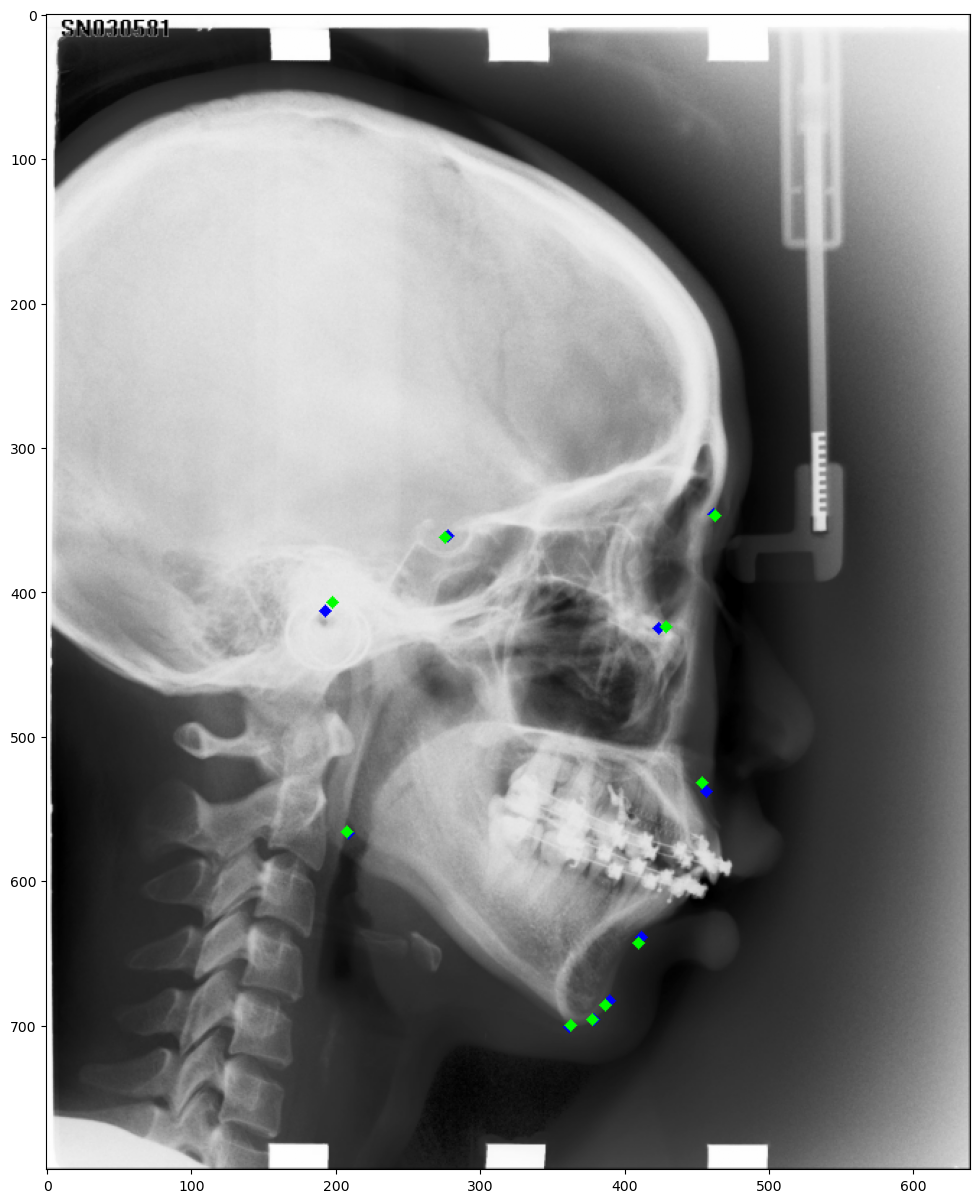

CPU times: total: 52.9 s
Wall time: 4.44 s


In [21]:
%%time
# sample = random.choice(dataset)
sample = dataset[3]

print(sample['id'])
image, target = sample['input'], sample['target']
pred = model(image.unsqueeze(0))

image = image.squeeze().detach().numpy()
true = target.squeeze().detach().numpy()
pred = pred.squeeze().detach().numpy()
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

for idx in range(args['num_classes']):
    pred_coord = np.array(np.where(pred[idx] > pred[idx].max() * .95))
    pred_coord = np.round(pred_coord.mean(axis=1))

    true_coord = np.array(np.where(true[idx] > true[idx].max() * .95))
    true_coord = np.round(true_coord.mean(axis=1))
    
    print("GT:" , true_coord , "Pred:", pred_coord)
    
    cv2.circle(
        img=image,
        center=(int(pred_coord[1]), int(pred_coord[0])),
        radius=2,
        color=(0, 0, 1), ## Pred
        thickness=3
    )

    cv2.circle(
        img=image,
        center=(int(true_coord[1]), int(true_coord[0])),
        radius=2,
        color=(0, 1, 0), ## True
        thickness=3
    )
    
plt.figure(figsize=(15,15))
# plt.axis('off')
plt.imshow(image)
plt.show()

9


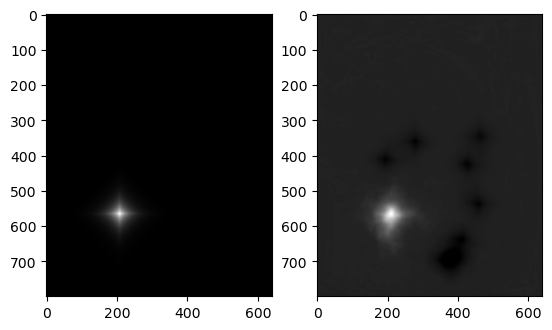

In [37]:
idx = random.choice(range(0, 10))

print(idx)
plt.subplot(1,2,1)
plt.imshow(true[idx], 'gray')

plt.subplot(1,2,2)
plt.imshow(pred[idx], 'gray')
plt.show()